# Is there a path to a midrange resurgence?

The purpose of this project is to take a look at the recent downward trend in midrange shooting in the NBA and to see if there exists a path to a midrange comeback

### Import packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Read in data from csv

In [4]:
shots = pd.read_csv("C:/Users/Katon/Documents/Datasets/NBA/2014-15_shot_logs.csv")

This data set was retrieved from *type source here*. It holds every shot from the 2014-15 NBA season. Looking at the column names shows the information we're working with:

In [5]:
shots.columns

Index(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER',
       'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT', 'CLOSEST_DEFENDER',
       'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST', 'FGM', 'PTS',
       'player_name', 'player_id'],
      dtype='object')

## Histogram shots by distance
Lets plot all the shots from the 2014-15 season, just to confirm that the midrange shot is truly as dead as people say it is

(0.0, 32.0)

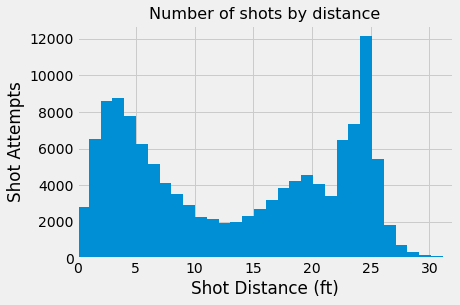

In [6]:
farthest_shot = int(max(shots['SHOT_DIST']))

plt.figure()
plt.hist(shots['SHOT_DIST'], bins=farthest_shot)
plt.title('Number of shots by distance', fontsize=16)
plt.xlabel('Shot Distance (ft)')
plt.ylabel('Shot Attempts')
plt.xlim(0,32)

It's clear that the midrange shot is not nearly as prevalent today as it once was. Roughly 2000 shots were taken from each midrange distance while over 12000 shots were taken from 24ft. Clearly layups and threes are valued much more than midrange shots. Lets figure out why that is.

## Expected Points per Shot (XPPS)
The standard measure of whether a shot is 'good' or not is XPPS - expected points per shot. This is a simple metric that multiplies a shot's success rate (field-goal percentage) by it's value (2 or 3 points). XPPS is the primary reason for the NBA's move away from the midrange since the start of the analytics revolution. It's easy to see why.

(0.0, 2.0)

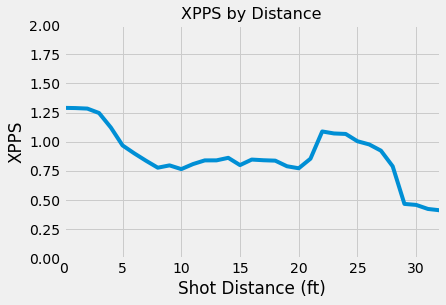

In [7]:
exp_pts = np.zeros(farthest_shot)

for d in range(0, farthest_shot):
    x = shots[shots['SHOT_DIST'].astype(int) == d]
    exp_pts[d] = sum(x['PTS']) / len(x)

# Plot the results
plt.figure()
plt.plot(exp_pts)
plt.title('XPPS by Distance', fontsize=16)
plt.xlabel('Shot Distance (ft)')
plt.ylabel('XPPS')
plt.xlim(0,32)
plt.ylim(0,2)

The plot indicates that conventional wisdom is correct. The most efficient shots are near the rim (\~1.25 XPPS), followed closely by three-pointers (~1.1 XPPS), with midrange shots much lower at around 0.8 XPPS. 
Plotting these results we can see that close-range shots (0-5 ft) are still by far the most efficient

## Does an efficient midrange shot exist?

Because midrange shots are less efficient, NBA offenses have made the logical correction: design plays and schemes to put players in the position to make layups and 3s. The modern NBA offense generally looks very different from Auberbach's Zipper or Phil's Triangle, which emphasized off-ball screens and cuts. Nowadays, offenses are less structured and more free-flowing. Pick-and-rolls, dribble-handoffs, drive-and-kicks, and fast breaks are all heavily emphasized. A common set is putting 3 ballhandlers high to run pick-and-rolls and stashing sharpshooters in either corner for kickouts.

This style of offense makes sense for a few reasons. First, as discussed, it prioritizes layups and three-pointers. Midrange shots are typically only taken when the play breaks down into isolation or if you're C.J. McCollum. Additionally, plugging in players with different skillsets can result in the same simple set looking vastly different. A LeBron James/Dwight Howard screen-and-roll at the top of the key looks very different than the same play run by Rajon Rondo and Anthony Davis. The dizzing combinations of drives, pullups, rolls, slips, pops, fades, and kicks-to-the-corner mean that one of basketball's oldest plays is still enough to drive defenses crazy. Lastly, it's the best way to make sure that the ball spends most of it's time in the hands of the best player (or whoever a coach wants as their primary ballhandler). Each player's Usage % - an estimate of the percentage of team plays used by a player while he is on the floor - can basically be manipulated exactly to the coach's liking.

Ok, we've confirmed that midrange shots today are in fact less efficient than layups or 3s. But does that mean that it should be totally avoided. Let's look at some potential reasons why midrange shots are so much less efficient, and see if there exists a midrange shot worth taking.

## Hypothesis \#1: Midrange shots are more contested
Since midrange shots are rarely taken as the team's first choice, it's likely that they are generally more contested than 3-pt shots.

In [9]:
mid_shots = shots[(shots['SHOT_DIST'] >=8) & (shots['SHOT_DIST'] <22)]
np.mean(mid_shots['CLOSE_DEF_DIST'])

4.36227458635434

In [10]:
_3pt_shots = shots[shots['SHOT_DIST'] >=22]
np.mean(_3pt_shots['CLOSE_DEF_DIST'])

6.001394771020385

In [11]:
pct_open_mid = len(mid_shots[mid_shots['CLOSE_DEF_DIST'] > 4]) / len(mid_shots)
pct_open_mid

0.5076454731362707

In [13]:
pct_open_3 = len(_3pt_shots[_3pt_shots['CLOSE_DEF_DIST'] > 4]) / len(_3pt_shots)
pct_open_3

0.7868597888079507

From this we can see that midrange shots are in fact much more contested than 3-pointers. The average 3pt shot attempt was taken with 6 feat of space, compared to just above 4ft for midrange shots. Additionally, nearly 80% of three-pointers are taken with the nearest defender more than 4ft away. The number shrinks to just 50% for midrange shots. Changing the open shot criterion to 3ft of space, the numbers change to 72% and 92% for midrange and 3-pointers respectively. No wonder 3pt shots have such a high XPPS: they aren't as well defended.
### Hypothesis 1 confirmed

## Hypothesis \#2: Midrange shots are taken later in the shot clock
If midrange shots are taken as the team's last resort, or as a result of isolation play after the initial set breaks down, it makes sense that midrange shots would be taken with less time on the shot clock than 3-pointers and layups.

In [35]:
np.mean(mid_shots['SHOT_CLOCK'])

11.021151303929798

In [36]:
np.mean(_3pt_shots['SHOT_CLOCK'])

12.056334711866434

In [50]:
pct_rushed_mid = len(mid_shots[mid_shots['SHOT_CLOCK'] < 3]) / len(mid_shots)
pct_rushed_mid

0.05663227365681353

In [51]:
pct_rushed_3 = len(_3pt_shots[_3pt_shots['SHOT_CLOCK'] < 3]) / len(_3pt_shots)
pct_rushed_3

0.05768253430459089

It appears that while midrange shots are on average taken with slightly less time on the shot clock than 3-pointers, the difference is only 1 second and is likely negligible. Moreover, an equal percentage of midrange and 3s are taken in the final 3 seconds of the shot clock
### Hypothesis 2 rejected

## Hypothesis 3: Midrange shots are primarily taken off the dribble while 3-pt shots are taken off the catch
Any baller (or avid 2k player) could tell you that off-the-dribble shots are significantly harder than catch-and-shoot, even for players considered off-the-dribble specialists like Steph Curry or James Harden.

(0.75, 1.25)

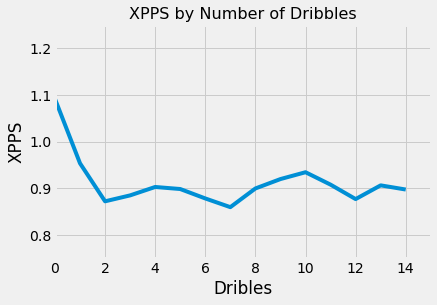

In [32]:
exp_pts_dribbles = np.zeros(15)

for d in range(0, 15):
    x = shots[shots['DRIBBLES'] == d]
    exp_pts_dribbles[d] = sum(x['PTS']) / len(x)

# Plot the results
plt.figure()
plt.plot(exp_pts_dribbles)
plt.title('XPPS by Number of Dribbles', fontsize=16)
plt.xlabel('Dribbles')
plt.ylabel('XPPS')
plt.xlim(0,15)
plt.ylim(0.75,1.25)

The graph above confirms conventional wisdom that shots off the catch are easier to make. In fact, off-the-catch shots are the only ones with an expected points value higher than 1. While shots off of 1 dribble are slightly more efficient, there is no effect of dribble on shot efficiency when 2 or more dribbles are taken. 

In [20]:
np.mean(mid_shots['DRIBBLES'])

2.6475181260457332

In [21]:
np.mean(_3pt_shots['DRIBBLES'])

1.1425546332373369

In [17]:
len(mid_shots[mid_shots['DRIBBLES'] == 0]) / len(mid_shots)

0.3635434095556795

In [18]:
len(_3pt_shots[_3pt_shots['DRIBBLES'] == 0]) / len(_3pt_shots)

0.7360381726805579

### Open shot XPPS
Lets replicate the XPPS by distance chart from above, this time only looking at open shots (defined as shots where the nearest defender is more than 4ft away). 

(0.0, 2.0)

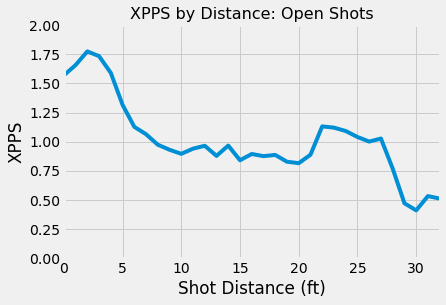

In [32]:
exp_pts_open = np.zeros(farthest_shot)

for d in range(0, farthest_shot):
    x = shots[(shots['SHOT_DIST'].astype(int) == d) & (shots['CLOSE_DEF_DIST'] > 4)]
    exp_pts_open[d] = sum(x['PTS']) / len(x)

# Plot the results
plt.figure()
plt.plot(exp_pts_open)
plt.title('XPPS by Distance: Open Shots', fontsize=16)
plt.xlabel('Shot Distance (ft)')
plt.ylabel('XPPS')
plt.xlim(0,32)
plt.ylim(0,2)

As expected, XPPS values on open shots are higher all around. However, open midrange shots still have a lower value than 3-pointers, even if contested threes are included (recall the XPPS for all 3s was roughly 1.1). So implementing an offense that searched specifically for open midrange jumpshots is still not as effective as an offense that searches specifically for open 3s.